# Homework 1
Done by:
* Name: Deyan Milchev
* Specialty: Computer science
* Course: 3
* Group: 7
* Faculty number: 0MI0800126

## Description
A dataset of people that were travelling in the Titanic spaceship is given to us. Some of the people in the dataset were transported to another parallel dimension midtravel. We have to analyse the dataset and find some correlations, train models and try to predict if a person will be transported or not.

## Feature description
* PassengerId -> unique ID of a passenger. It has the format: gggg_pp where gggg is the number of the group they are travelling in and pp is the personal number in their group.
* HomePlanet -> the planet of which the passenger has started their travel.
* CryoSleep -> says if the passenger has been put into sleep while travelling. Passengers in cryo sleep can't exit their rooms.
* Cabin -> number of cabin  where the passenger is staying. It has the format  (deck/number/side) where side is P(left) or S(right).
* Destination -> the planet where the passenger will get off the spaceship.
* Age -> age of the passenger.
* VIP -> if the passenger has paid for special VIP service.
* RoomService -> amount paid for room service.
* FoodCourt -> amount paid for food court.
* ShopppingMall -> amount paid in the shopping mall.
* Spa-> amount paid for spa.
* VRDeck -> amount paid for VR deck.
* Name -> name of the passenger.
* Transported -> if the passenger has been transported to another dimension of not (that's the target feature).

## Task
* What't the type of the attributes?
* What are the statistical characteristics of the attributes?
* Are there any missing data? What are you going to do about it?
* What about outliers? Are there any? What are you going to do with them?
* Analyse the correlations between features. Illustrate them. Plot at least 10 graphics and comment on them. What are the conclusions you can make out of them?
* Train and analyse classification models (at least 5). How to they compare?

## Code

#### Reset

In [150]:
%reset -f

#### Imports

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression



#### Load data

In [152]:
df = pd.read_csv('data/spaceship_titanic.csv')
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


#### Information about the data

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [154]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


#### Missing data

In [155]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [156]:
#percent of missing data
(df.isna().sum() / len(df)) * 100

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

As we can see there is some missing data, but it is up to 2.5% which can be considered low, but we still have to be careful and do our best to handle it.It's important to say that there is no missing values in the "Transported" columns, which means that we would not have to delete whole rows of our dataset.

#### Unique data?

In [157]:
len(df['PassengerId'].unique()) / len(df) == 1

True

We can see values in the passengerId columns are unique, which is good.

In [158]:
len(df['HomePlanet'].unique())

4

In [159]:
df['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

There are only 3 unique home planets, which is good.

In [160]:
len(df['Destination'].unique())

4

In [161]:
df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

#### Is target feature balanced?

In [162]:
df['Transported'].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

<Axes: xlabel='Transported', ylabel='count'>

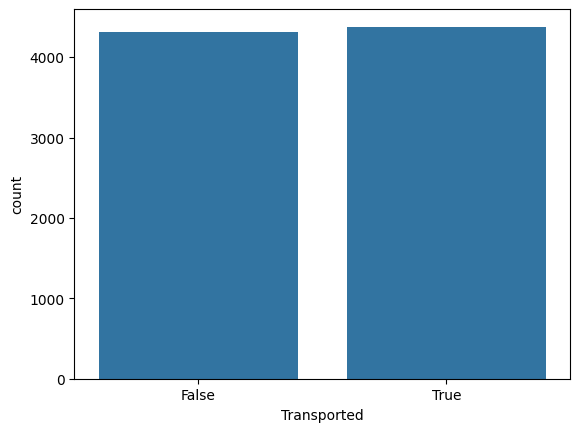

In [163]:
sns.countplot(df, x='Transported')

We can conclude that the target feature is balanced.

#### Feature engineering
Some of the columns have specific format that they use. They are representing more than one feature in one column which is inconvenient. That's why we will separate them into different columns.

* Separate passengerId into group number and number in group.
* Separate cabin into deck, number and side

In [164]:
df[['PassengerGroup', 'PassengerNumber']] = df['PassengerId'].str.split('_', expand=True)
df['PassengerGroup'] = list(map(lambda x : int(x), df['PassengerGroup']))
df['PassengerNumber'] = list(map(lambda x : int(x), df['PassengerNumber']))

df = df.drop(columns='PassengerId')

In [165]:
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,PassengerNumber
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,1
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,1
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,2
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,1
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,1
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,1
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,1


In [166]:
df[['Deck', 'CabinNumber', 'Side']] = df['Cabin'].str.split('/', expand=True)
df['CabinNumber'] = pd.to_numeric(df['CabinNumber'], errors='coerce').astype('Int64')

df = df.drop(columns='Cabin')

In [167]:
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,PassengerNumber,Deck,CabinNumber,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,1,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,1,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,2,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,1,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,1,A,98,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,1,G,1499,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,1,G,1500,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,1,E,608,S


In [168]:
df['TotalSpending'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa']
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,PassengerNumber,Deck,CabinNumber,Side,TotalSpending
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1,B,0,P,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,1,F,0,S,692.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,1,A,0,S,10334.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,2,A,0,S,4983.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,1,F,1,S,1089.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,1,A,98,P,8462.0
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,1,G,1499,S,0.0
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,1,G,1500,S,1873.0
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,1,E,608,S,1402.0


#### Dealing with outliers
I am not sure if we have talked about how to deal with outliers in class (I missed 2 weeks). I made my own research and learnt about Z score and its implications. I also found that Z score of 3 is usually considered high. 

In [169]:
z_scores = np.abs(stats.zscore(df.select_dtypes(include='float64')))
z_scores

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpending
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
8688,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8689,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8691,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For some reason the built in function for z_score isn't working and I could not find how to debug it, so that's why I hard coded.

In [170]:
z_scores = pd.DataFrame(index=df.select_dtypes(include='float64').index, columns=df.select_dtypes(include='float64').columns)

for col in df.select_dtypes(include='float64').columns:
    mean = np.mean(df[col])
    std_dev = np.std(df[col])

    for i in range(len(df)):
        z_scores.loc[i, col] = (df[col][i] - mean) / std_dev

z_scores

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpending
0,0.702095,-0.337025,-0.284274,-0.287317,-0.273736,-0.266098,-0.496496
1,-0.333233,-0.173528,-0.278689,-0.245971,0.209267,-0.227692,-0.204727
2,2.01351,-0.272527,1.934922,-0.287317,5.634034,-0.223327,3.860635
3,0.287964,-0.337025,0.511931,0.32625,2.655075,-0.097634,1.60449
4,-0.885407,0.117466,-0.240833,-0.03759,0.223344,-0.264352,-0.03734
...,...,...,...,...,...,...,...
8688,0.840138,-0.337025,3.947464,-0.287317,1.171754,-0.201506,3.071343
8689,-0.747364,-0.337025,-0.284274,-0.287317,-0.273736,-0.266098,-0.496496
8690,-0.195189,-0.337025,-0.284274,2.808634,-0.272856,-0.266098,0.293219
8691,0.218942,-0.337025,0.366715,-0.287317,0.036829,2.557627,0.094631


In [171]:
threshold = 3

for col in z_scores.columns:
    print(f'Number of datapoints over {threshold} in {col} is: {len(z_scores[z_scores[col] > threshold])}')

Number of datapoints over 3 in Age is: 26
Number of datapoints over 3 in RoomService is: 168
Number of datapoints over 3 in FoodCourt is: 166
Number of datapoints over 3 in ShoppingMall is: 126
Number of datapoints over 3 in Spa is: 173
Number of datapoints over 3 in VRDeck is: 164
Number of datapoints over 3 in TotalSpending is: 173


* There are only 26 peope that are over the threshold in the age column. The other columns that have more than 150 outliers are representing spendings of people. I can't be sure, but in my opinion it is normal that there are some people that have spent much more money than the mean. I think that this is genuine data which shouldn't be excluded from the dataset, but when modelling, it we should be careful and use models and algorithms that are less sensitive to outliers. For example instead of using MSE we should be using MAE, because MAE 'punishes' outliers less.

#### Exploratory data analysis

<Axes: xlabel='Age', ylabel='TotalSpending'>

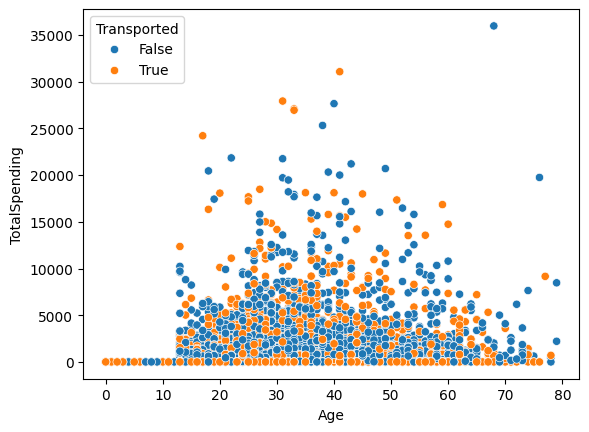

In [172]:
sns.scatterplot(data=df, x='Age', y='TotalSpending', hue='Transported')

I can't see a correlation between Age, TotalSpending and transportation.

<Axes: xlabel='Spa', ylabel='VRDeck'>

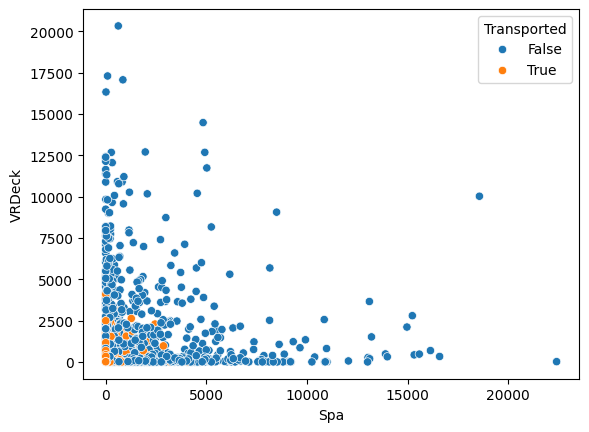

In [173]:
sns.scatterplot(data=df, x='Spa', y='VRDeck', hue='Transported')

* We can see that paying for Spa and VRDeck means that you have a lower chance of transportation.
* I think it's a good idea to extract the payment features and pairplot them to illustrate the correlation between them.

In [174]:
payment_df = df[['RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpending', 'Transported']]
payment_df

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpending,Transported
0,0.0,0.0,0.0,0.0,0.0,0.0,False
1,109.0,9.0,25.0,549.0,44.0,692.0,True
2,43.0,3576.0,0.0,6715.0,49.0,10334.0,False
3,0.0,1283.0,371.0,3329.0,193.0,4983.0,False
4,303.0,70.0,151.0,565.0,2.0,1089.0,True
...,...,...,...,...,...,...,...
8688,0.0,6819.0,0.0,1643.0,74.0,8462.0,False
8689,0.0,0.0,0.0,0.0,0.0,0.0,False
8690,0.0,0.0,1872.0,1.0,0.0,1873.0,True
8691,0.0,1049.0,0.0,353.0,3235.0,1402.0,False


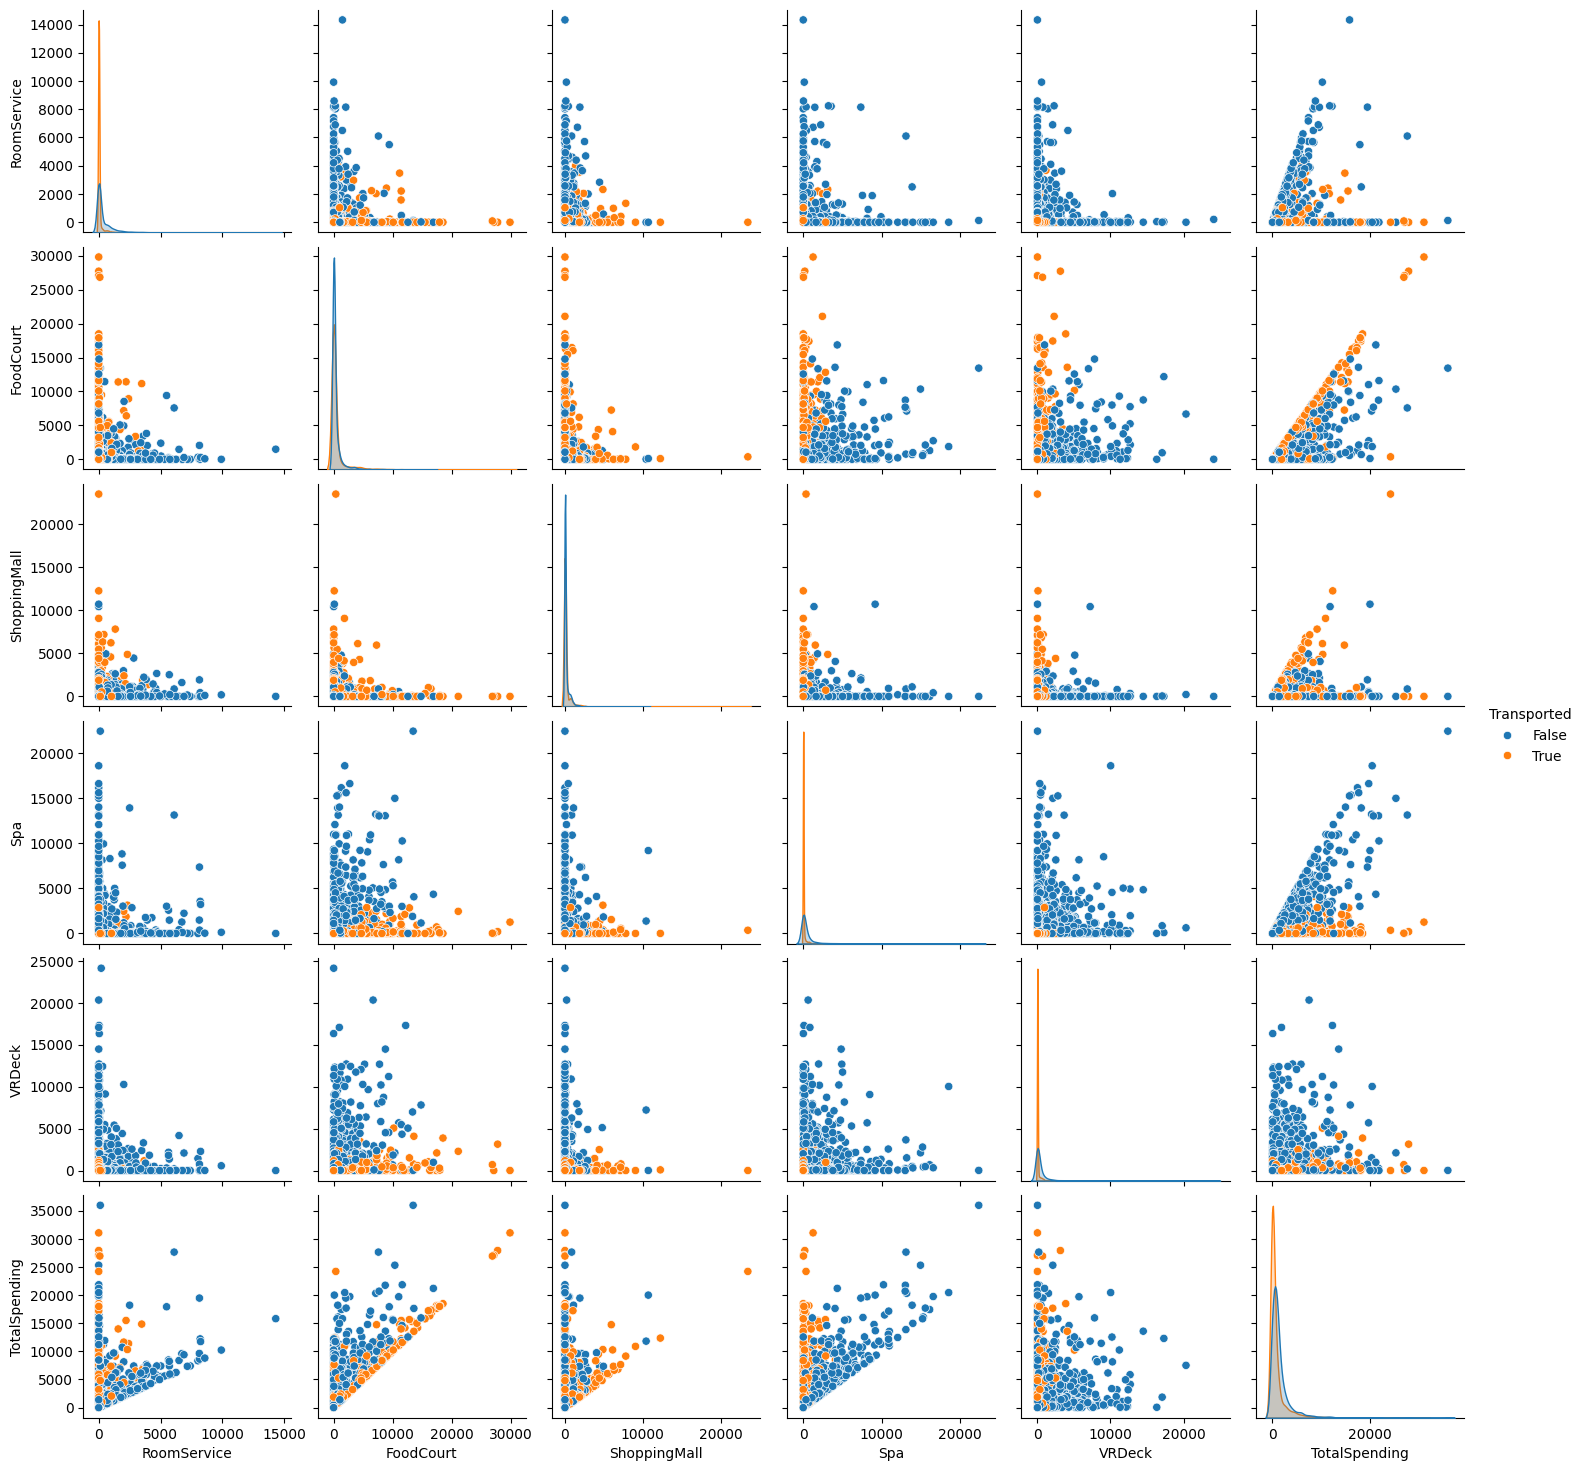

In [175]:
sns.pairplot(data=payment_df, hue='Transported')

#### From this plot we can conclude that:
* The most important think in my opinion is that most people have not payed for anything which means that we have to be careful when making conclusions.
* There is correlation between total spending and transportation. The distribution of the spendings of people that have been transported is slightly to the left than of people that have not been transported.
* There is very obvious line that distinguishes transported and not transported people in the Spa-FoodCourt cell. We can easily see that the more a person has payed for food and less for spa the bigger their chance for transportation is.
* We can also see that spending money in the shopping mall means that there is bigger chance of transportation.
* Other than that I don't see anything that meaningful. 

<Axes: xlabel='Deck'>

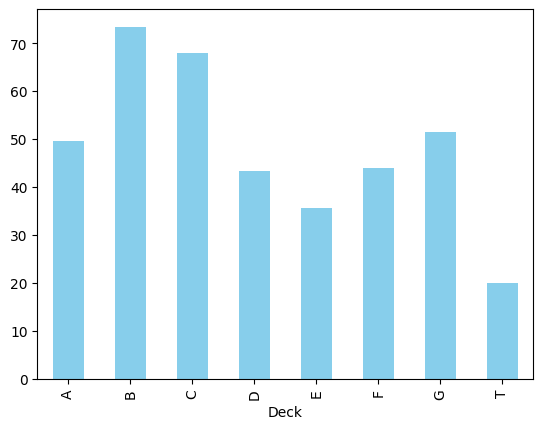

In [176]:
(df.groupby('Deck')['Transported'].mean() * 100).plot(kind='bar', color='skyblue')

* At first I was fast to conclude that people from deck F and G are more likely to be transported, but after thinking a little bit more I saw that in decks F and G there are more people than the others. This is the percentage of people transported from every deck and we can see that more than 70% of the people on deck B and a little under 70% of people on deck C have been transported, which a strong correlation.

<Axes: xlabel='Side'>

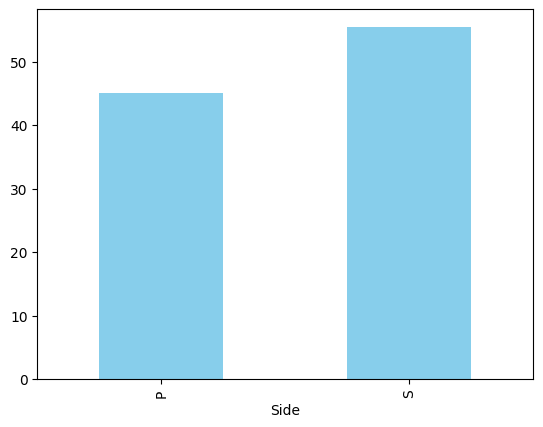

In [177]:
(df.groupby('Side')['Transported'].mean() * 100).plot(kind='bar', color='skyblue')

* The proportion of people transported base on the side of their cabin is very balanced.

<Axes: xlabel='HomePlanet'>

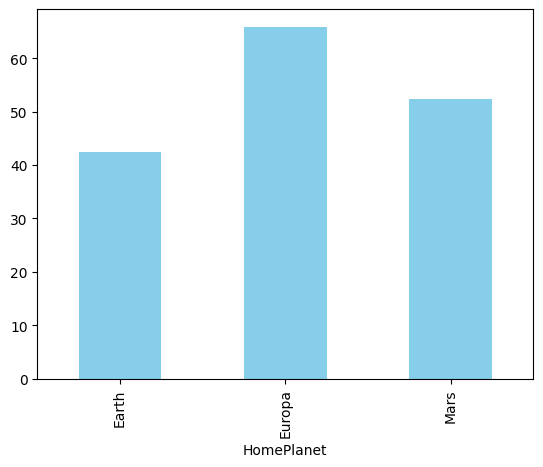

In [178]:
(df.groupby('HomePlanet')['Transported'].mean() * 100).plot(kind='bar', color='skyblue')

* There is some correlation between home planet and transportation but it isn't strong.

<Axes: xlabel='Destination'>

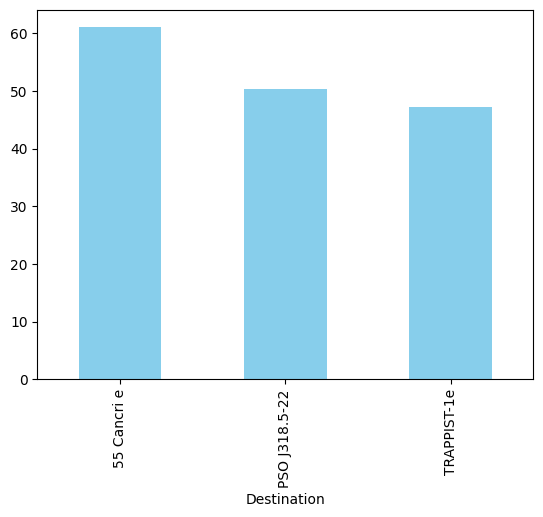

In [179]:
(df.groupby('Destination')['Transported'].mean() * 100).plot(kind='bar', color='skyblue')

* Not a strong correlation between destination and transportation, but there is some.

<Axes: xlabel='VIP'>

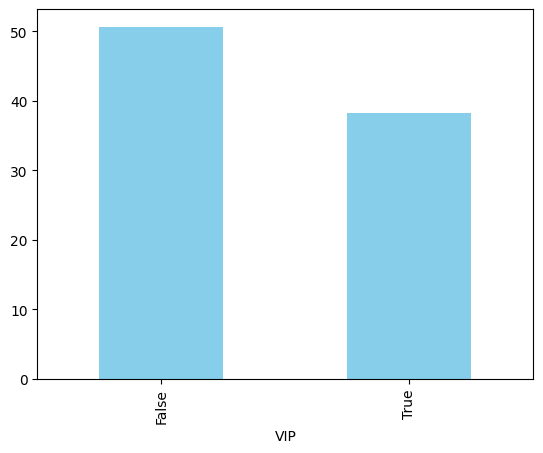

In [180]:
(df.groupby('VIP')['Transported'].mean() * 100).plot(kind='bar', color='skyblue')

* Maybe it is a little more likely for a person to be transported if they aren't VIP?

<Axes: xlabel='PassengerNumber'>

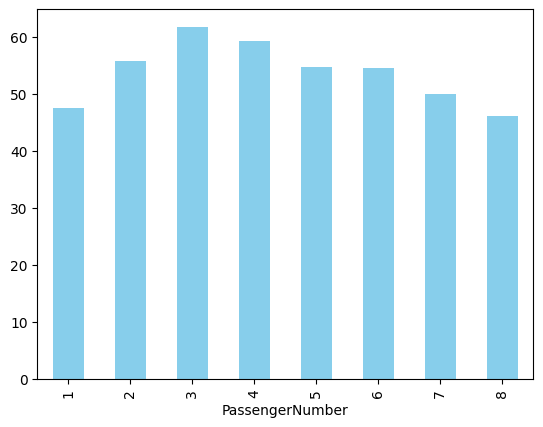

In [181]:
(df.groupby('PassengerNumber')['Transported'].mean() * 100).plot(kind='bar', color='skyblue')

* No correlation between passenger number and transportation

<Axes: xlabel='CryoSleep'>

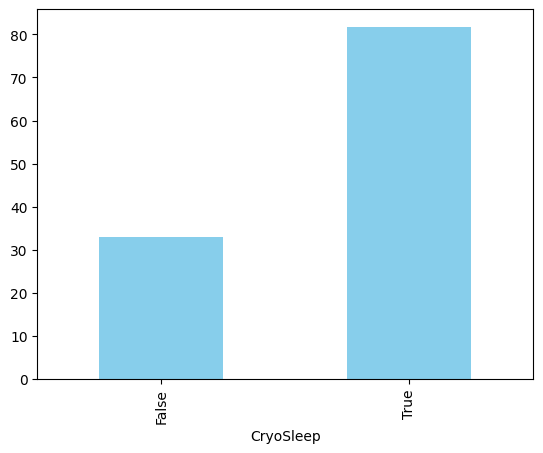

In [182]:
(df.groupby('CryoSleep')['Transported'].mean() * 100).plot(kind='bar', color='skyblue')

* Very strong correlation! More than 80% of people that have been put into cryo sleep have been transported!

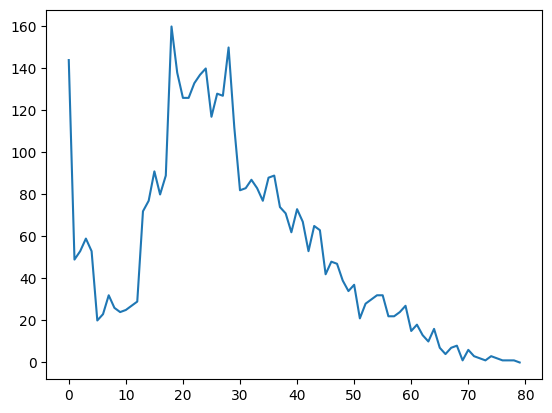

In [183]:
plt.plot(df.groupby('Age')['Transported'].sum())

<BarContainer object of 80 artists>

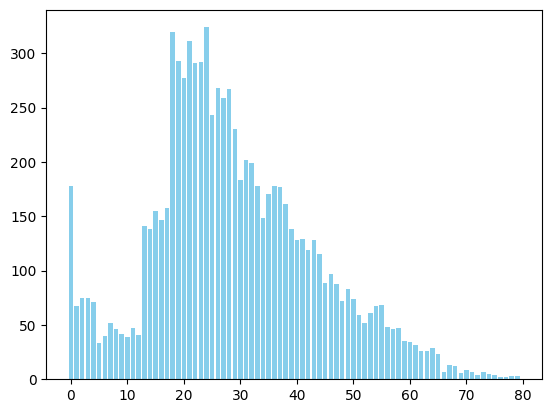

In [184]:
plt.bar(df['Age'].value_counts().index, df['Age'].value_counts().values, color='skyblue')

* Again at first I thought that there is very obvious correlation between age and transportation, but as we can see when we plot people that have been transported from every age (first diagram) and the count of people from every age (second diagram) we can see that basically the two plots are the same. Next diagram is plotting the percentage of people transported from every group and we can see that there isn't any correlation.

<BarContainer object of 80 artists>

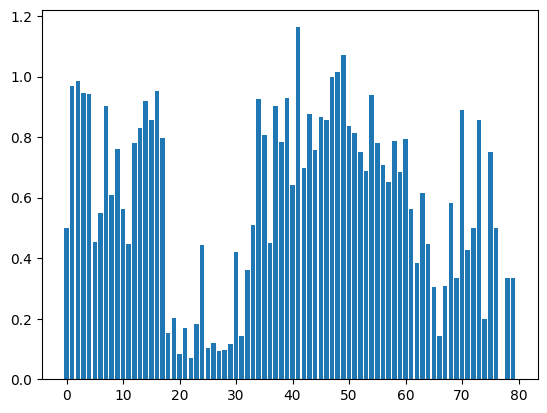

In [185]:
plt.bar(df['Age'].value_counts().index, df.groupby('Age')['Transported'].sum() / df['Age'].value_counts().values)

* People between 20 and 30 are less likely to be transported. As this shows the proportion of people transported for every age group.

#### One hot encoding non-numerical data

In [186]:
one_hot_encoder = OneHotEncoder()

encoded_features = one_hot_encoder.fit_transform(df[['Destination', 'Deck', 'Side']])
encoded_df = pd.DataFrame(encoded_features.todense(), columns=one_hot_encoder.get_feature_names_out(['Destination', 'Deck', 'Side']))

encoded_df = pd.concat([df, encoded_df], axis=1)
encoded_df = encoded_df.drop(columns=['Destination', 'Deck', 'Side'])

encoded_df

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_nan,Side_P,Side_S,Side_nan
0,Europa,False,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Earth,False,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Europa,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Europa,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Earth,False,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8689,Earth,True,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8690,Earth,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8691,Europa,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


####  Handling missing data
* HomePlanet features is an important feature as we saw in the data exploratory analysis. We have 201 rows with data missing for HomePlanet. We will try to predict the missing data of this column with classification algorithms and see if they are any good. If they are, we can use the data from them to replace the missing values.

#### Predicting home planet

In [187]:
df['HomePlanet'].isna().sum()

201

In [188]:
rows_with_home_planet_nan = encoded_df[encoded_df['HomePlanet'].isna()]
rows_with_home_planet_nan


,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_nan,Side_P,Side_S,Side_nan
59,NaN,True,33.0,False,0.0,0.0,NaN,0.0,0.0,Colatz Keen,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
113,NaN,False,39.0,False,0.0,2344.0,0.0,65.0,6898.0,Batan Coning,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
186,NaN,True,24.0,False,0.0,0.0,NaN,0.0,0.0,Arraid Inicont,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
225,NaN,False,18.0,False,313.0,1.0,691.0,283.0,0.0,Almone Sté,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
234,NaN,True,54.0,False,0.0,0.0,0.0,0.0,0.0,Diphah Amsive,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,NaN,False,25.0,False,1258.0,0.0,22.0,19.0,0.0,Jurs Mone,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8613,NaN,False,53.0,False,0.0,4017.0,0.0,13.0,3147.0,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8666,NaN,False,38.0,NaN,28.0,1208.0,973.0,207.0,0.0,Gian Perle,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8674,NaN,False,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [189]:
rows_with_home_planet = encoded_df[~(encoded_df['HomePlanet'].isna())]
rows_with_home_planet = rows_with_home_planet.drop(columns='Name')
rows_with_home_planet

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_nan,Side_P,Side_S,Side_nan
0,Europa,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Earth,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Europa,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Europa,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Earth,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8689,Earth,True,18.0,False,0.0,0.0,0.0,0.0,0.0,False,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8690,Earth,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8691,Europa,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [190]:
X = rows_with_home_planet.drop(columns='HomePlanet')
y = rows_with_home_planet['HomePlanet']

In [191]:
X

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerGroup,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_nan,Side_P,Side_S,Side_nan
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,9276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8689,True,18.0,False,0.0,0.0,0.0,0.0,0.0,False,9278,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8690,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,9279,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8691,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,9280,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [192]:
y

0       Europa
1        Earth
2       Europa
3       Europa
4        Earth
         ...  
8688    Europa
8689     Earth
8690     Earth
8691    Europa
8692    Europa
Name: HomePlanet, Length: 8492, dtype: object

#### Splitting the data

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

Using random forest classification

In [194]:
rfc = RandomForestClassifier()
rfc

RandomForestClassifier()

In [195]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [196]:
predictions = rfc.predict(X_test)
predictions

array(['Earth', 'Earth', 'Earth', ..., 'Earth', 'Mars', 'Earth'],
      dtype=object)

In [197]:
set(predictions)

{'Earth', 'Europa', 'Mars'}

In [198]:
f1_score(y_test, predictions, average='macro')

0.9250289622698289

#### Filling the values
We can conclude that the model is very good at predicting the home planet of the passenger. We can use it to fill in missing values.

In [199]:
missing_values = encoded_df[encoded_df['HomePlanet'].isna()]
missing_values

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_nan,Side_P,Side_S,Side_nan
59,NaN,True,33.0,False,0.0,0.0,NaN,0.0,0.0,Colatz Keen,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
113,NaN,False,39.0,False,0.0,2344.0,0.0,65.0,6898.0,Batan Coning,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
186,NaN,True,24.0,False,0.0,0.0,NaN,0.0,0.0,Arraid Inicont,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
225,NaN,False,18.0,False,313.0,1.0,691.0,283.0,0.0,Almone Sté,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
234,NaN,True,54.0,False,0.0,0.0,0.0,0.0,0.0,Diphah Amsive,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,NaN,False,25.0,False,1258.0,0.0,22.0,19.0,0.0,Jurs Mone,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8613,NaN,False,53.0,False,0.0,4017.0,0.0,13.0,3147.0,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8666,NaN,False,38.0,NaN,28.0,1208.0,973.0,207.0,0.0,Gian Perle,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8674,NaN,False,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [200]:
X = missing_values.drop(columns=['Name', 'HomePlanet'])
X

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerGroup,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_nan,Side_P,Side_S,Side_nan
59,True,33.0,False,0.0,0.0,NaN,0.0,0.0,True,64,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
113,False,39.0,False,0.0,2344.0,0.0,65.0,6898.0,False,119,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
186,True,24.0,False,0.0,0.0,NaN,0.0,0.0,True,210,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
225,False,18.0,False,313.0,1.0,691.0,283.0,0.0,False,242,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
234,True,54.0,False,0.0,0.0,0.0,0.0,0.0,True,251,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,False,25.0,False,1258.0,0.0,22.0,19.0,0.0,False,9084,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8613,False,53.0,False,0.0,4017.0,0.0,13.0,3147.0,False,9194,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8666,False,38.0,NaN,28.0,1208.0,973.0,207.0,0.0,True,9248,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8674,False,13.0,False,39.0,0.0,1085.0,24.0,0.0,False,9257,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [201]:
X['predictions']= rfc.predict(X)
X['predictions']

59        Mars
113     Europa
186     Europa
225       Mars
234     Europa
         ...  
8515      Mars
8613    Europa
8666     Earth
8674      Mars
8684     Earth
Name: predictions, Length: 201, dtype: object

In [202]:
df.loc[X.index, 'HomePlanet'] = X['predictions']
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,PassengerNumber,Deck,CabinNumber,Side,TotalSpending
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1,B,0,P,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,1,F,0,S,692.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,1,A,0,S,10334.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,2,A,0,S,4983.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,1,F,1,S,1089.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,1,A,98,P,8462.0
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,1,G,1499,S,0.0
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,1,G,1500,S,1873.0
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,1,E,608,S,1402.0


#### One hot encoding data

In [203]:
one_hot_encoder = OneHotEncoder()

encoded_features = one_hot_encoder.fit_transform(df[['HomePlanet', 'Deck', 'Side']])
encoded_df = pd.DataFrame(encoded_features.todense(), columns=one_hot_encoder.get_feature_names_out(['HomePlanet', 'Deck', 'Side']))

encoded_df = pd.concat([df, encoded_df], axis=1)
encoded_df = encoded_df.drop(columns=['HomePlanet', 'Deck', 'Side'])

encoded_df

,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_nan,Side_P,Side_S,Side_nan
0,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8689,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8690,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8691,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Predicting destination

In [204]:
df['Destination'].isna().sum()

182

In [205]:
rows_with_destination_nan = df[df['Destination'].isna()]
rows_with_destination_nan


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,PassengerNumber,Deck,CabinNumber,Side,TotalSpending
47,Mars,True,NaN,19.0,False,0.0,0.0,0.0,0.0,0.0,Mass Chmad,True,45,2,F,10,P,0.0
128,Earth,False,NaN,34.0,False,0.0,22.0,0.0,564.0,207.0,Monah Gambs,False,138,2,E,5,P,586.0
139,Earth,False,NaN,41.0,False,0.0,0.0,0.0,0.0,607.0,Andan Estron,False,152,1,F,32,P,0.0
347,Earth,False,NaN,23.0,False,348.0,0.0,0.0,4.0,368.0,Blanie Floydendley,False,382,1,G,64,P,352.0
430,Earth,True,NaN,50.0,False,0.0,0.0,0.0,0.0,0.0,Ronia Sosanturney,False,462,1,G,67,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8372,Earth,True,NaN,20.0,False,0.0,0.0,0.0,0.0,0.0,Erina Bonnondry,True,8956,2,G,1453,P,0.0
8551,Mars,True,NaN,41.0,False,0.0,0.0,0.0,0.0,0.0,Blers Corte,True,9130,1,F,1765,S,0.0
8616,Mars,True,NaN,33.0,False,0.0,0.0,0.0,0.0,0.0,Ceros Purle,True,9195,2,F,1779,S,0.0
8621,Europa,False,NaN,41.0,True,0.0,7964.0,0.0,3238.0,5839.0,Aludram Platch,False,9197,2,C,308,P,11202.0


In [206]:
rows_destination_planet = encoded_df[~(encoded_df['Destination'].isna())]
rows_destination_planet = rows_destination_planet.drop(columns='Name')
rows_destination_planet

,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_nan,Side_P,Side_S,Side_nan
0,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8689,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8690,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8691,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [207]:
X = rows_destination_planet.drop(columns='Destination')
y = rows_destination_planet['Destination']

In [208]:
X

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerGroup,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_nan,Side_P,Side_S,Side_nan
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,9276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8689,True,18.0,False,0.0,0.0,0.0,0.0,0.0,False,9278,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8690,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,9279,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8691,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,9280,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [209]:
y

0         TRAPPIST-1e
1         TRAPPIST-1e
2         TRAPPIST-1e
3         TRAPPIST-1e
4         TRAPPIST-1e
            ...      
8688      55 Cancri e
8689    PSO J318.5-22
8690      TRAPPIST-1e
8691      55 Cancri e
8692      TRAPPIST-1e
Name: Destination, Length: 8511, dtype: object

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [211]:
rfc = RandomForestClassifier()
rfc

RandomForestClassifier()

In [212]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [213]:
predictions = rfc.predict(X_test)
predictions

array(['TRAPPIST-1e', 'TRAPPIST-1e', '55 Cancri e', ..., 'TRAPPIST-1e',
       'TRAPPIST-1e', 'TRAPPIST-1e'], dtype=object)

In [214]:
precision_score(y_test, predictions, average='macro')

0.46683093336159426

In [215]:
f1_score(y_test, predictions, average='macro')

0.40046305583416925

* Unfortunately this model is bad. I don't think it's wise to use it to fill in the missing values.
* On the other hand CryoSleep is another very important feature. If a ship crashes it sounds like it is very important if you are asleep or not.

#### One hot encoding non-numerical data

In [216]:
one_hot_encoder = OneHotEncoder()

encoded_features = one_hot_encoder.fit_transform(df[['HomePlanet', 'Destination', 'Deck', 'Side']])
encoded_df = pd.DataFrame(encoded_features.todense(), columns=one_hot_encoder.get_feature_names_out(['HomePlanet', 'Destination', 'Deck', 'Side']))

encoded_df = pd.concat([df, encoded_df], axis=1)
encoded_df = encoded_df.drop(columns=['HomePlanet', 'Destination', 'Deck', 'Side'])

encoded_df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_nan,Side_P,Side_S,Side_nan
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8689,True,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8690,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8691,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Predicting cryo sleep

In [217]:
rows_with_cryo_sleep_nan = df[df['CryoSleep'].isna()]
rows_with_cryo_sleep_nan


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,PassengerNumber,Deck,CabinNumber,Side,TotalSpending
92,Earth,NaN,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Thewis Connelson,True,99,2,G,12,P,0.0
98,Earth,NaN,TRAPPIST-1e,27.0,False,0.0,0.0,570.0,2.0,131.0,Carry Cleachrand,False,105,1,F,21,P,572.0
104,Europa,NaN,TRAPPIST-1e,40.0,False,0.0,331.0,0.0,0.0,1687.0,Aldeba Bootious,False,110,2,B,5,P,331.0
111,Mars,NaN,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,NaN,Rohs Pead,True,115,1,F,24,P,0.0
152,Earth,NaN,TRAPPIST-1e,58.0,False,0.0,985.0,0.0,5.0,0.0,Hilip Grifford,True,173,1,E,11,S,990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8620,Europa,NaN,55 Cancri e,44.0,False,0.0,0.0,0.0,0.0,0.0,Bellus Platch,True,9197,1,C,308,P,0.0
8651,Earth,NaN,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,0.0,0.0,Hard Hinglendez,False,9227,5,G,1498,P,0.0
8664,Earth,NaN,TRAPPIST-1e,32.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True,9246,1,G,1490,S,0.0
8675,Earth,NaN,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True,9259,1,F,1893,P,2056.0


In [218]:
rows_with_cryo_sleep = encoded_df[~(encoded_df['CryoSleep'].isna())]
rows_with_cryo_sleep = rows_with_cryo_sleep.drop(columns='Name')
rows_with_cryo_sleep

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerGroup,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_nan,Side_P,Side_S,Side_nan
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,9276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8689,True,18.0,False,0.0,0.0,0.0,0.0,0.0,False,9278,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8690,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,9279,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8691,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,9280,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [219]:
X = rows_with_cryo_sleep.drop(columns='CryoSleep')
y = rows_with_cryo_sleep['CryoSleep']

In [220]:
X

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerGroup,PassengerNumber,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_nan,Side_P,Side_S,Side_nan
0,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,24.0,False,109.0,9.0,25.0,549.0,44.0,True,2,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,16.0,False,303.0,70.0,151.0,565.0,2.0,True,4,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,9276,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8689,18.0,False,0.0,0.0,0.0,0.0,0.0,False,9278,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8690,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,9279,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8691,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,9280,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [221]:
y = y.astype(bool)

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [223]:
rfc = RandomForestClassifier()
rfc

RandomForestClassifier()

In [224]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [225]:
predictions = rfc.predict(X_test)
predictions

array([ True, False, False, ...,  True, False,  True])

In [226]:
precision_score(y_test, predictions)

0.918232044198895

In [227]:
f1_score(y_test, predictions)

0.9259052924791087

* The model is very good. F1 score is more than 90%! We can use it to fill in the missing data.

#### Filling the values

In [228]:
missing_values = encoded_df[encoded_df['CryoSleep'].isna()]
missing_values

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_nan,Side_P,Side_S,Side_nan
92,NaN,2.0,False,0.0,0.0,0.0,0.0,0.0,Thewis Connelson,True,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
98,NaN,27.0,False,0.0,0.0,570.0,2.0,131.0,Carry Cleachrand,False,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
104,NaN,40.0,False,0.0,331.0,0.0,0.0,1687.0,Aldeba Bootious,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
111,NaN,26.0,False,0.0,0.0,0.0,0.0,NaN,Rohs Pead,True,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
152,NaN,58.0,False,0.0,985.0,0.0,5.0,0.0,Hilip Grifford,True,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8620,NaN,44.0,False,0.0,0.0,0.0,0.0,0.0,Bellus Platch,True,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8651,NaN,8.0,False,0.0,0.0,0.0,0.0,0.0,Hard Hinglendez,False,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8664,NaN,32.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8675,NaN,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [229]:
X = missing_values.drop(columns=['Name', 'CryoSleep'])
X

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerGroup,PassengerNumber,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_nan,Side_P,Side_S,Side_nan
92,2.0,False,0.0,0.0,0.0,0.0,0.0,True,99,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
98,27.0,False,0.0,0.0,570.0,2.0,131.0,False,105,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
104,40.0,False,0.0,331.0,0.0,0.0,1687.0,False,110,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
111,26.0,False,0.0,0.0,0.0,0.0,NaN,True,115,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
152,58.0,False,0.0,985.0,0.0,5.0,0.0,True,173,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8620,44.0,False,0.0,0.0,0.0,0.0,0.0,True,9197,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8651,8.0,False,0.0,0.0,0.0,0.0,0.0,False,9227,5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8664,32.0,False,0.0,0.0,0.0,0.0,0.0,True,9246,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8675,44.0,False,1030.0,1015.0,0.0,11.0,NaN,True,9259,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [230]:
X['predictions']= rfc.predict(X)
X['predictions']

92       True
98      False
104     False
111      True
152     False
        ...  
8620     True
8651    False
8664     True
8675    False
8687    False
Name: predictions, Length: 217, dtype: bool

In [231]:
df.loc[X.index, 'CryoSleep'] = X['predictions']
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,PassengerNumber,Deck,CabinNumber,Side,TotalSpending
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1,B,0,P,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,1,F,0,S,692.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,1,A,0,S,10334.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,2,A,0,S,4983.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,1,F,1,S,1089.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,1,A,98,P,8462.0
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,1,G,1499,S,0.0
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,1,G,1500,S,1873.0
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,1,E,608,S,1402.0


In [232]:
df['CryoSleep'].isna().sum()

0

#### Note: 
I did not do any optimisation of the models used to predict home planet, destintion and cryo sleep for filling in the  missing data points. We could try a few different models with different parameters to see what is best like we do later (when predicting transported feature). In the end I think that the random forest classifier did a pretty good job at predicting home planet and cryo sleep. Good enough is good enough...

#### Dealing with missing data about spendings

* I think it is okay to fill in the missing data about spendings with zeros. It is typical that a person won't spend money as we saw earlier.

In [233]:
df['VIP'] = df['VIP'].astype(bool)
df.loc[df['VIP'].isna(), 'VIP'] = False

In [234]:
df['RoomService'] = df['RoomService'].astype(float)
df.loc[df['RoomService'].isna(), 'RoomService'] = 0

In [235]:
df.loc[df['FoodCourt'].isna(), 'FoodCourt'] = 0

In [236]:
df.loc[df['ShoppingMall'].isna(), 'ShoppingMall'] = 0

In [237]:
df.loc[df['Spa'].isna(), 'Spa'] = 0

In [238]:
df.loc[df['VRDeck'].isna(), 'VRDeck'] = 0

In [239]:
df.loc[df['TotalSpending'].isna(), 'TotalSpending'] = 0

#### Dealing with missing age

* We have only 159 missing values for age. I don't think it is possible to predict the age out of the other data we have. That's why I think the best thing we can do is fill the missing values for age with the mean.

In [240]:
mean = np.mean(df['Age'])
mean = int(mean)

df.loc[df['Age'].isna(), 'Age'] = 25

In [241]:
df['Age']

0       39.0
1       24.0
2       58.0
3       33.0
4       16.0
        ... 
8688    41.0
8689    18.0
8690    26.0
8691    32.0
8692    44.0
Name: Age, Length: 8693, dtype: float64

#### The rest of the missing data

In [242]:
df.isna().sum()

HomePlanet           0
CryoSleep            0
Destination        182
Age                  0
VIP                  0
RoomService          0
FoodCourt            0
ShoppingMall         0
Spa                  0
VRDeck               0
Name               200
Transported          0
PassengerGroup       0
PassengerNumber      0
Deck               199
CabinNumber        199
Side               199
TotalSpending        0
dtype: int64

We have missing data for destination, name, deck, cabin number and side. 
* Missing names aren't a problem because we don't really care about this feature. Names won't even end up in the training of the models.
* As we saw destination can't be predicted so we are forced to leave the NaNs.
* I am not sure what to do with the cabin data so I will leave it like that for now.

## Modelling

In [243]:
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,PassengerNumber,Deck,CabinNumber,Side,TotalSpending
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1,B,0,P,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,1,F,0,S,692.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,1,A,0,S,10334.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,2,A,0,S,4983.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,1,F,1,S,1089.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,1,A,98,P,8462.0
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,1,G,1499,S,0.0
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,1,G,1500,S,1873.0
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,1,E,608,S,1402.0


#### One hot encoding

In [244]:
# Let's use pandas this time
one_hot_encoded_data = pd.get_dummies(df, columns = ['HomePlanet', 'Destination', 'Deck', 'Side'], drop_first=True)
one_hot_encoded_data

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,...,False,True,True,False,False,False,False,False,False,False
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,...,False,True,False,False,False,False,True,False,False,True
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,...,False,True,False,False,False,False,False,False,False,True
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,...,False,True,False,False,False,False,False,False,False,True
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,...,False,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,...,False,False,False,False,False,False,False,False,False,False
8689,True,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,...,True,False,False,False,False,False,False,True,False,True
8690,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,...,False,True,False,False,False,False,False,True,False,True
8691,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,...,False,False,False,False,False,True,False,False,False,True


#### Removing missing data

In [245]:
one_hot_encoded_data = one_hot_encoded_data.dropna()
one_hot_encoded_data.isna().sum()

CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Name                         0
Transported                  0
PassengerGroup               0
PassengerNumber              0
CabinNumber                  0
TotalSpending                0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
Deck_B                       0
Deck_C                       0
Deck_D                       0
Deck_E                       0
Deck_F                       0
Deck_G                       0
Deck_T                       0
Side_S                       0
dtype: int64

#### Splitting the data

In [246]:
X = one_hot_encoded_data.drop(columns=['Transported', 'Name'])
y = one_hot_encoded_data['Transported']

X.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'PassengerGroup', 'PassengerNumber', 'CabinNumber',
       'TotalSpending', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck_B',
       'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Side_S'],
      dtype='object')

In [247]:
X

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerGroup,PassengerNumber,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,1,1,...,False,True,True,False,False,False,False,False,False,False
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,2,1,...,False,True,False,False,False,False,True,False,False,True
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,3,1,...,False,True,False,False,False,False,False,False,False,True
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,3,2,...,False,True,False,False,False,False,False,False,False,True
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,4,1,...,False,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,9276,1,...,False,False,False,False,False,False,False,False,False,False
8689,True,18.0,False,0.0,0.0,0.0,0.0,0.0,9278,1,...,True,False,False,False,False,False,False,True,False,True
8690,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,9279,1,...,False,True,False,False,False,False,False,True,False,True
8691,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,9280,1,...,False,False,False,False,False,True,False,False,False,True


In [248]:
y

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8296, dtype: bool

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

#### Create the comparasion dataframe

In [250]:
df_results = pd.DataFrame(
    columns=['experiment', 'accuracy', 'precision', 'recall', 'f1-score']
)

df_results

,experiment,accuracy,precision,recall,f1-score


#### Grid search

In [251]:
n_estimators=[64,100,128]
max_features= [4, 7, 10]
bootstrap = [True,False]
oob_score = [True,False]
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}

#### Random forests

In [252]:
random_forest = RandomForestClassifier()
grid = GridSearchCV(random_forest, param_grid)

In [253]:
grid.fit(X_train, y_train)

/home/deyan/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
45 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/home/deyan/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/deyan/.local/lib/python3.10/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/deyan/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    raise ValueError("Out of bag estimation only a

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [4, 7, 10],
                         'n_estimators': [64, 100, 128],
                         'oob_score': [True, False]})

In [254]:
grid.best_params_

{'bootstrap': True, 'max_features': 7, 'n_estimators': 128, 'oob_score': False}

In [255]:
predictions = grid.predict(X_test)

In [256]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.80      0.82      0.81      1235
        True       0.82      0.80      0.81      1254

    accuracy                           0.81      2489
   macro avg       0.81      0.81      0.81      2489
weighted avg       0.81      0.81      0.81      2489



f1-score of 80% is considered okay, but let's see if we can do better then that

In [257]:
df_results = pd.concat([df_results, pd.DataFrame({
    'experiment': ['Random forest'],
    'accuracy': [accuracy_score(y_test, predictions)],
    'precision': [precision_score(y_test, predictions)],
    'recall': [recall_score(y_test, predictions)],
    'f1-score': [f1_score(y_test, predictions)]
})], ignore_index=True)

df_results

/tmp/ipykernel_7815/1349608399.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, pd.DataFrame({


,experiment,accuracy,precision,recall,f1-score
0,Random forest,0.809964,0.819297,0.799043,0.809043


#### Removing NaNs

In [258]:
X.isna().sum()

CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
PassengerGroup               0
PassengerNumber              0
CabinNumber                  0
TotalSpending                0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
Deck_B                       0
Deck_C                       0
Deck_D                       0
Deck_E                       0
Deck_F                       0
Deck_G                       0
Deck_T                       0
Side_S                       0
dtype: int64

#### Scaling data
In the following algorithms scaled data should be used.

In [259]:
scaler = StandardScaler()
scaler

StandardScaler()

In [260]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [261]:
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1.347157,-0.050884,-0.219102,-0.337474,-0.273953,-0.302853,-0.273104,-0.263458,-0.029256,-0.489992,...,-0.317245,0.690004,-0.310292,-0.317245,-0.243485,-0.330872,-0.707198,1.517006,-0.013124,0.987847
1,-0.742304,1.690526,-0.219102,-0.337474,-0.273953,-0.302853,-0.273104,-0.263458,0.957756,-0.489992,...,-0.317245,-1.449267,3.222774,-0.317245,-0.243485,-0.330872,-0.707198,-0.659193,-0.013124,0.987847
2,-0.742304,-0.329509,-0.219102,-0.268159,0.075741,-0.293949,-0.266810,-0.263458,-0.277326,-0.489992,...,-0.317245,0.690004,-0.310292,-0.317245,-0.243485,-0.330872,1.414031,-0.659193,-0.013124,0.987847
3,-0.742304,0.715336,-0.219102,2.564510,-0.273953,2.252528,-0.268608,0.150395,0.627622,-0.489992,...,-0.317245,-1.449267,-0.310292,-0.317245,4.107030,-0.330872,-0.707198,-0.659193,-0.013124,0.987847
4,-0.742304,0.088429,-0.219102,-0.337474,0.126887,-0.233403,-0.273104,-0.254634,0.248553,0.449079,...,-0.317245,0.690004,-0.310292,-0.317245,-0.243485,-0.330872,-0.707198,1.517006,-0.013124,0.987847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5802,-0.742304,-0.677791,-0.219102,0.551297,-0.173446,-0.302853,-0.266810,-0.263458,0.638163,-0.489992,...,3.152137,-1.449267,-0.310292,-0.317245,-0.243485,-0.330872,1.414031,-0.659193,-0.013124,-1.012302
5803,1.347157,0.018773,-0.219102,-0.337474,-0.273953,-0.302853,-0.273104,-0.263458,0.431124,-0.489992,...,-0.317245,0.690004,3.222774,-0.317245,-0.243485,-0.330872,-0.707198,-0.659193,-0.013124,0.987847
5804,-0.742304,-1.304699,-0.219102,-0.337474,-0.273953,-0.302853,-0.273104,-0.263458,0.506787,1.388149,...,-0.317245,0.690004,-0.310292,-0.317245,-0.243485,-0.330872,-0.707198,1.517006,-0.013124,-1.012302
5805,1.347157,0.367054,-0.219102,-0.337474,-0.273953,-0.302853,-0.273104,-0.263458,-1.389314,-0.489992,...,-0.317245,-1.449267,-0.310292,-0.317245,-0.243485,-0.330872,-0.707198,1.517006,-0.013124,0.987847


In [262]:
X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.756526,-0.689303,-0.225065,-0.162621,-0.296475,0.874334,-0.262118,-0.277983,0.671140,-0.487943,...,-0.319085,0.669279,-0.336376,-0.297196,-0.246890,-0.358885,1.473330,-0.651712,-0.034738,0.999598
1,-0.756526,2.541195,-0.225065,-0.354485,0.215614,0.262017,-0.169989,2.253029,0.373930,-0.487943,...,-0.319085,0.669279,-0.336376,-0.297196,4.050382,-0.358885,-0.678735,-0.651712,-0.034738,-1.000402
2,-0.756526,-0.267934,-0.225065,2.937494,-0.298612,-0.007785,-0.048342,-0.251331,-0.039047,-0.487943,...,-0.319085,0.669279,-0.336376,-0.297196,4.050382,-0.358885,-0.678735,-0.651712,-0.034738,-1.000402
3,-0.756526,-0.408390,-0.225065,-0.354485,0.821716,-0.315856,-0.229918,-0.277983,-0.509165,1.458356,...,-0.319085,0.669279,-0.336376,-0.297196,-0.246890,2.786411,-0.678735,-0.651712,-0.034738,0.999598
4,1.321832,0.364120,-0.225065,-0.354485,-0.298612,-0.315856,-0.262118,-0.277983,1.690780,-0.487943,...,-0.319085,0.669279,-0.336376,-0.297196,-0.246890,-0.358885,-0.678735,1.534421,-0.034738,-1.000402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484,1.321832,1.979370,-0.225065,-0.354485,-0.298612,-0.315856,-0.262118,-0.277983,-0.817877,-0.487943,...,-0.319085,0.669279,-0.336376,-0.297196,-0.246890,-0.358885,-0.678735,1.534421,-0.034738,0.999598
2485,-0.756526,0.925946,-0.225065,-0.354485,-0.298612,2.893064,-0.203978,-0.218967,0.032565,-0.487943,...,-0.319085,0.669279,-0.336376,-0.297196,-0.246890,-0.358885,-0.678735,1.534421,-0.034738,-1.000402
2486,1.321832,0.785490,-0.225065,-0.354485,-0.298612,-0.315856,-0.262118,-0.277983,-1.138463,-0.487943,...,-0.319085,0.669279,-0.336376,-0.297196,-0.246890,-0.358885,-0.678735,1.534421,-0.034738,0.999598
2487,-0.756526,-1.040444,-0.225065,-0.346070,-0.298612,0.600705,0.003536,-0.269416,0.587283,-0.487943,...,-0.319085,0.669279,-0.336376,-0.297196,-0.246890,2.786411,-0.678735,-0.651712,-0.034738,0.999598


#### Support vector machines

In [263]:
svc = SVC()
svc

SVC()

#### Grid search

In [264]:
param_grid = {
    'C': [0.1, 1, 10], 
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'] 
}

In [265]:
grid= GridSearchCV(estimator=svc, param_grid=param_grid, cv=5)

In [266]:
X_test_scaled.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
dtype: int64

In [267]:
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [268]:
grid.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

In [269]:
predictions = grid.predict(X_test_scaled)
predictions

array([ True, False, False, ...,  True, False,  True])

In [270]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.80      0.80      0.80      1235
        True       0.80      0.81      0.81      1254

    accuracy                           0.80      2489
   macro avg       0.80      0.80      0.80      2489
weighted avg       0.80      0.80      0.80      2489



In [271]:
df_results = pd.concat([df_results, pd.DataFrame({
    'experiment': ['Support vector classifier'],
    'accuracy': [accuracy_score(y_test, predictions)],
    'precision': [precision_score(y_test, predictions)],
    'recall': [recall_score(y_test, predictions)],
    'f1-score': [f1_score(y_test, predictions)]
})], ignore_index=True)

df_results

,experiment,accuracy,precision,recall,f1-score
0,Random forest,0.809964,0.819297,0.799043,0.809043
1,Support vector classifier,0.802732,0.801105,0.809410,0.805236


#### KNN

In [272]:
param_grid = {
    'n_neighbors': [2, 4, 8, 16, 32, 64, 128, 256], 
    'weights': ['uniform', 'distance'],
}

In [273]:
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [274]:
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 4, 8, 16, 32, 64, 128, 256],
                         'weights': ['uniform', 'distance']})

In [275]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 4, 8, 16, 32, 64, 128, 256],
                         'weights': ['uniform', 'distance']})

In [276]:
grid_search.best_params_

{'n_neighbors': 16, 'weights': 'distance'}

In [277]:
predictions = grid_search.predict(X_test_scaled)
predictions

array([ True, False, False, ...,  True, False,  True])

In [278]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.77      0.81      0.79      1235
        True       0.80      0.76      0.78      1254

    accuracy                           0.79      2489
   macro avg       0.79      0.79      0.78      2489
weighted avg       0.79      0.79      0.78      2489



In [279]:
df_results = pd.concat([df_results, pd.DataFrame({
    'experiment': ['KNN'],
    'accuracy': [accuracy_score(y_test, predictions)],
    'precision': [precision_score(y_test, predictions)],
    'recall': [recall_score(y_test, predictions)],
    'f1-score': [f1_score(y_test, predictions)]
})], ignore_index=True)

df_results

,experiment,accuracy,precision,recall,f1-score
0,Random forest,0.809964,0.819297,0.799043,0.809043
1,Support vector classifier,0.802732,0.801105,0.809410,0.805236
2,KNN,0.785054,0.800837,0.763158,0.781543


#### Logistic regression

In [280]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'max_iter': [100, 200],
}

In [281]:
lr = LogisticRegression()
lr

LogisticRegression()

In [282]:
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5)
grid_search

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'max_iter': [100, 200],
                         'penalty': ['l1', 'l2']})

In [283]:
grid_search.fit(X_train_scaled, y_train)

/home/deyan/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/home/deyan/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/deyan/.local/lib/python3.10/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/deyan/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver, self

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'max_iter': [100, 200],
                         'penalty': ['l1', 'l2']})

In [284]:
grid_search.best_params_

{'C': 10, 'max_iter': 100, 'penalty': 'l2'}

In [285]:
predictions = grid_search.predict(X_test_scaled)
predictions

array([ True, False, False, ...,  True, False,  True])

In [286]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.81      0.75      0.78      1235
        True       0.77      0.82      0.80      1254

    accuracy                           0.79      2489
   macro avg       0.79      0.79      0.79      2489
weighted avg       0.79      0.79      0.79      2489



In [287]:
df_results = pd.concat([df_results, pd.DataFrame({
    'experiment': ['Logistic regression'],
    'accuracy': [accuracy_score(y_test, predictions)],
    'precision': [precision_score(y_test, predictions)],
    'recall': [recall_score(y_test, predictions)],
    'f1-score': [f1_score(y_test, predictions)]
})], ignore_index=True)

df_results

,experiment,accuracy,precision,recall,f1-score
0,Random forest,0.809964,0.819297,0.799043,0.809043
1,Support vector classifier,0.802732,0.801105,0.809410,0.805236
2,KNN,0.785054,0.800837,0.763158,0.781543
3,Logistic regression,0.788670,0.771642,0.824561,0.797224


#### Ada boost

In [288]:
param_grid = {
    'n_estimators': [50, 100, 200],  
    'learning_rate': [0.01, 0.1, 0.5, 1.0, 2, 3],  
}

In [289]:
ab = AdaBoostClassifier()

In [290]:
grid_search = GridSearchCV(estimator=ab, param_grid=param_grid, cv=5)

In [291]:
grid_search.fit(X_train_scaled, y_train)

/home/deyan/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/deyan/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/deyan/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/deyan/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warning

/home/deyan/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/deyan/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/deyan/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/deyan/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warning

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1.0, 2, 3],
                         'n_estimators': [50, 100, 200]})

In [292]:
grid_search.best_params_

{'learning_rate': 0.5, 'n_estimators': 100}

In [293]:
predictions = grid_search.predict(X_test_scaled)
predictions

array([ True, False, False, ...,  True, False,  True])

In [294]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.82      0.76      0.79      1235
        True       0.78      0.83      0.80      1254

    accuracy                           0.80      2489
   macro avg       0.80      0.79      0.79      2489
weighted avg       0.80      0.80      0.79      2489



In [295]:
df_results = pd.concat([df_results, pd.DataFrame({
    'experiment': ['Ada boost'],
    'accuracy': [accuracy_score(y_test, predictions)],
    'precision': [precision_score(y_test, predictions)],
    'recall': [recall_score(y_test, predictions)],
    'f1-score': [f1_score(y_test, predictions)]
})], ignore_index=True)

df_results

,experiment,accuracy,precision,recall,f1-score
0,Random forest,0.809964,0.819297,0.799043,0.809043
1,Support vector classifier,0.802732,0.801105,0.809410,0.805236
2,KNN,0.785054,0.800837,0.763158,0.781543
3,Logistic regression,0.788670,0.771642,0.824561,0.797224
4,Ada boost,0.795098,0.775964,0.834131,0.803997


## Final conclusions
* From the above table we can conclude that the different models are performing almost the same. The highest **f1-score** has been achieved by the support vector classifier, but the difference between all of them is very, very small. 
* Which model we will choose depends on the client and what is the purpose of the model. Highest recall is achieved by the Ada boost algorithm and highest accuracy by the random forest classifier. If we are afraid of false positive results we should pick the model with the highest accuracy. On the other hand if we don't want to miss a true positive we should use the model with highest recall. If we need a balanced model, the highest f1-score is what we should be looking for.
* The models and their performance is acceptable. Of course what a good performance is, really depends on the client. If a person is dying for every miss-classification f1-score lower than 1.0 seems low, while if we just lose a penny for every miss-classification it can be possible that an f1-score of 0.5 can be good. In general everything 0.8 is considered okay and we are just there.
* In this homework I really did my best. I did my own research about things I didn't know, I tried to explain everything in a simple manner and tried to make every code and markdown block to not only do it's job, but also to look good (I am bad at this haha). In the end this was possible, because Simo gave us 3 more days for the homework. 
* Благодаря ти, Симо! Надявам се, че домашното ми ще ти хареса. До скоро!